In [49]:
# Import module for data manipulation
import pandas as pd
# Import module for linear algebra
import numpy as np
# Import module for data visualization
from plotnine import *
import plotnine
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [24]:
# Load the data
df = pd.read_csv('data.csv')
# The dimension of data
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
# Print the first 5 rows
df.head()

Dimension data: 60392 rows and 15 columns


,pol_number,pol_eff_dt,gender,agecat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.000,7/12/1968,381.000,D,133.600,2,HBACK,1.331,NaN,0,0.000,716.530
1,21919609,12/30/2020,F,2.000,11/5/1982,549.000,D,163.600,1,UTE,3.740,NaN,0,0.000,716.530
2,72577057,12/30/2020,M,2.000,11/26/1983,649.000,B,117.500,4,COUPE,0.880,NaN,0,0.000,716.530
3,92175225,12/30/2020,M,4.000,11/2/1960,743.000,B,100.700,3,SEDAN,1.045,NaN,0,0.000,716.530
4,66223239,12/30/2020,F,4.000,1/4/1968,817.000,C,115.500,4,HBACK,0.473,NaN,0,0.000,716.530


In [25]:
# Inspect the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pol_number      60392 non-null  int64  
 1   pol_eff_dt      60392 non-null  object 
 2   gender          60392 non-null  object 
 3   agecat          55561 non-null  float64
 4   date_of_birth   60392 non-null  object 
 5   credit_score    57591 non-null  float64
 6   area            60392 non-null  object 
 7   traffic_index   56889 non-null  float64
 8   veh_age         60392 non-null  int64  
 9   veh_body        60392 non-null  object 
 10  veh_value       60392 non-null  float64
 11  claim_office    10030 non-null  object 
 12  numclaims       60392 non-null  int64  
 13  claimcst0       60392 non-null  float64
 14  annual_premium  60392 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 6.9+ MB


In [26]:
import datetime

features = df
# features = features.drop(columns=['pol_number', 'claim_office', 'annual_premium'])
features = features.drop(columns=['claim_office', 'annual_premium'])
# features[np.isnan(features['agecat'])]

def get_age_at_eff_dt(pol_eff_dt_str, date_of_birth_str):
    pol_eff_dt = datetime.datetime.strptime(pol_eff_dt_str, '%m/%d/%Y')
    date_of_birth = datetime.datetime.strptime(date_of_birth_str, '%m/%d/%Y')
    age_at_eff_dt = pol_eff_dt - date_of_birth
    return age_at_eff_dt.days//365

features['age_at_eff_dt'] = features.apply(lambda row: get_age_at_eff_dt(row['pol_eff_dt'], row['date_of_birth']), axis = 1)
features = features.drop(columns=['agecat', 'date_of_birth','pol_eff_dt'])

In [27]:
# Inspect the categorical variables
features.select_dtypes('object').nunique()

gender       2
area         6
veh_body    13
dtype: int64

In [28]:
# Inspect the numerical variables
features.describe()

,pol_number,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,age_at_eff_dt
count,60392.000,57591.000,56889.000,60392.000,60392.000,60392.000,60392.000,60392.000
mean,54992042.969,662.193,103.893,2.674,1.956,0.214,644.876,50.279
std,25870034.663,136.450,33.689,1.068,1.330,0.552,3354.632,15.324
min,10000396.000,301.000,0.000,1.000,0.000,0.000,0.000,20.000
25%,32804730.500,602.000,80.300,2.000,1.111,0.000,0.000,39.000
50%,55001798.500,682.000,108.300,3.000,1.650,0.000,0.000,50.000
75%,77296135.000,772.000,132.000,4.000,2.365,0.000,0.000,60.000
max,99998382.000,850.000,207.000,4.000,38.016,5.000,69478.898,97.000


In [29]:
# Check missing value
features.isna().sum()
# features['credit_score'].isna() and features['traffic_index'].isna()

pol_number          0
gender              0
credit_score     2801
area                0
traffic_index    3503
veh_age             0
veh_body            0
veh_value           0
numclaims           0
claimcst0           0
age_at_eff_dt       0
dtype: int64

In [30]:
features = features.dropna()

In [33]:
features.to_excel('features.xlsx')

In [35]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54252 entries, 0 to 60389
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pol_number     54252 non-null  int64  
 1   gender         54252 non-null  object 
 2   credit_score   54252 non-null  float64
 3   area           54252 non-null  object 
 4   traffic_index  54252 non-null  float64
 5   veh_age        54252 non-null  int64  
 6   veh_body       54252 non-null  object 
 7   veh_value      54252 non-null  float64
 8   numclaims      54252 non-null  int64  
 9   claimcst0      54252 non-null  float64
 10  age_at_eff_dt  54252 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 5.0+ MB


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(features[['credit_score', 'traffic_index', 'veh_age', 'veh_value', 'numclaims', 'claimcst0', 'age_at_eff_dt']])
transformed_numeric_features = scaler.transform(features[['credit_score', 'traffic_index', 'veh_age', 'veh_value', 'numclaims', 'claimcst0', 'age_at_eff_dt']])
features[['credit_score_new', 'traffic_index_new', 'veh_age_new', 'veh_value_new', 'numclaims_new', 'claimcst0_new', 'age_at_eff_dt_new']] = transformed_numeric_features

In [42]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54252 entries, 0 to 60389
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pol_number         54252 non-null  int64  
 1   gender             54252 non-null  object 
 2   credit_score       54252 non-null  float64
 3   area               54252 non-null  object 
 4   traffic_index      54252 non-null  float64
 5   veh_age            54252 non-null  int64  
 6   veh_body           54252 non-null  object 
 7   veh_value          54252 non-null  float64
 8   numclaims          54252 non-null  int64  
 9   claimcst0          54252 non-null  float64
 10  age_at_eff_dt      54252 non-null  int64  
 11  credit_score_new   54252 non-null  float64
 12  traffic_index_new  54252 non-null  float64
 13  veh_age_new        54252 non-null  float64
 14  veh_value_new      54252 non-null  float64
 15  numclaims_new      54252 non-null  float64
 16  claimcst0_new      542

In [45]:
# Convert dataframe to matrix
dfMatrix = features[['gender', 'area', 'veh_body', 'credit_score_new', 'traffic_index_new', 'veh_age_new', 'veh_value_new', 'numclaims_new', 'claimcst0_new', 'age_at_eff_dt_new']].to_numpy()

In [46]:
dfMatrix

array([['F', 'D', 'HBACK', ..., 0.0, 0.0, 0.41558441558441556],
       ['F', 'D', 'UTE', ..., 0.0, 0.0, 0.2337662337662338],
       ['M', 'B', 'COUPE', ..., 0.0, 0.0, 0.2207792207792208],
       ...,
       ['F', 'C', 'HBACK', ..., 0.0, 0.0, 0.5584415584415585],
       ['M', 'D', 'HBACK', ..., 0.0, 0.0, 0.4935064935064935],
       ['M', 'F', 'STNWG', ..., 0.0, 0.0, 0.44155844155844154]],
      dtype=object)

In [47]:
# Get the position of categorical columns
features_final = features[['gender', 'area', 'veh_body', 'credit_score_new', 'traffic_index_new', 'veh_age_new', 'veh_value_new', 'numclaims_new', 'claimcst0_new', 'age_at_eff_dt_new']]
catColumnsPos = [features_final.columns.get_loc(col) for col in list(features_final.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(features_final.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['gender', 'area', 'veh_body']
Categorical columns position  : [0, 1, 2]


In [68]:
cost = []
kprototypes = []

In [69]:
# Choose optimal K using Elbow method
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
        kprototypes.append(kprototype)
    except:
        break
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


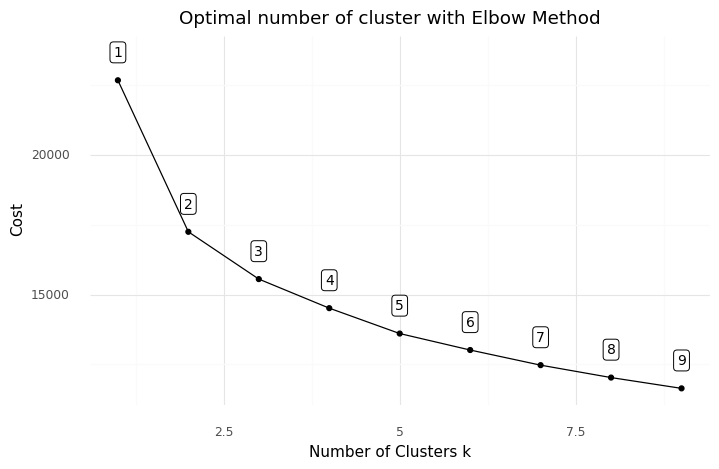

<ggplot: (8789804104644)>

In [70]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [56]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)

array([2, 2, 1, ..., 0, 2, 2], dtype=uint16)

In [58]:
clusters = _

In [67]:
from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KPrototypes
from sklearn.metrics import silhouette_score
from gower import gower_matrix

# kproto = KPrototypes(n_clusters=n_clusters, categorical=cat_cols, random_state=random_state)
# clusters = kproto.fit_predict(X)

silhouette_avg = silhouette_score(gower_matrix(dfMatrix), clusters, metric='precomputed')
print("The average silhouette score for k-prototype clustering with %d clusters is %f" % (3, silhouette_avg))

The average silhouette score for k-prototype clustering with 3 clusters is 0.108883


In [73]:
%store kprototypes

Stored 'kprototypes' (list)


In [74]:
kprototype_3 = kprototypes[2]

In [78]:
# Cluster centorid
# kprototype_3.cluster_centroids_
# Check the iteration of the clusters created
# kprototype_3.n_iter_
# # Check the cost of the clusters created
kprototype_3.cost_

15557.619427119453

In [85]:
kprototype_5 = kprototypes[4]
silhouette_avg = silhouette_score(gower_matrix(dfMatrix), kprototype_5.labels_, metric='precomputed')
print("The average silhouette score for k-prototype clustering with %d clusters is %f" % (5, silhouette_avg))

KeyboardInterrupt: 

In [80]:
# Add the cluster to the dataframe
features['Cluster Labels'] = kprototype_3.labels_
features['Segment'] = features['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
features['Segment'] = features['Segment'].astype('category')
features['Segment'] = features['Segment'].cat.reorder_categories(['First','Second','Third'])

In [82]:
# Cluster interpretation
# ['gender', 'area', 'veh_body', 'credit_score_new', 'traffic_index_new', 
# 'veh_age_new', 'veh_value_new', 'numclaims_new', 'claimcst0_new', 
# 'age_at_eff_dt_new']]

features.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
features.groupby('Segment').agg(
    {
        'Total':'count',
        'gender': lambda x: x.value_counts().index[0],
        'area': lambda x: x.value_counts().index[0],
        'veh_body': lambda x: x.value_counts().index[0],
        'credit_score': 'mean',
        'traffic_index': 'mean',
        'veh_age': 'mean',
        'veh_value': 'mean',
        'numclaims': 'mean',
        'claimcst0': 'mean',
        'age_at_eff_dt': 'mean'
    }
).reset_index()

,Segment,Total,gender,area,veh_body,credit_score,traffic_index,veh_age,veh_value,numclaims,claimcst0,age_at_eff_dt
0,First,20902,F,C,SEDAN,729.861,106.574,3.507,1.305,0.089,43.882,54.723
1,Second,11813,M,A,STNWG,514.107,97.623,3.262,1.767,0.491,1259.950,43.733
2,Third,21537,F,C,HBACK,677.522,104.663,1.545,2.680,0.172,852.410,51.402
